# Signal and Image Processing Lab 4 - Filter Analysis

### Malik Hacini

In [14]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

### Question 1

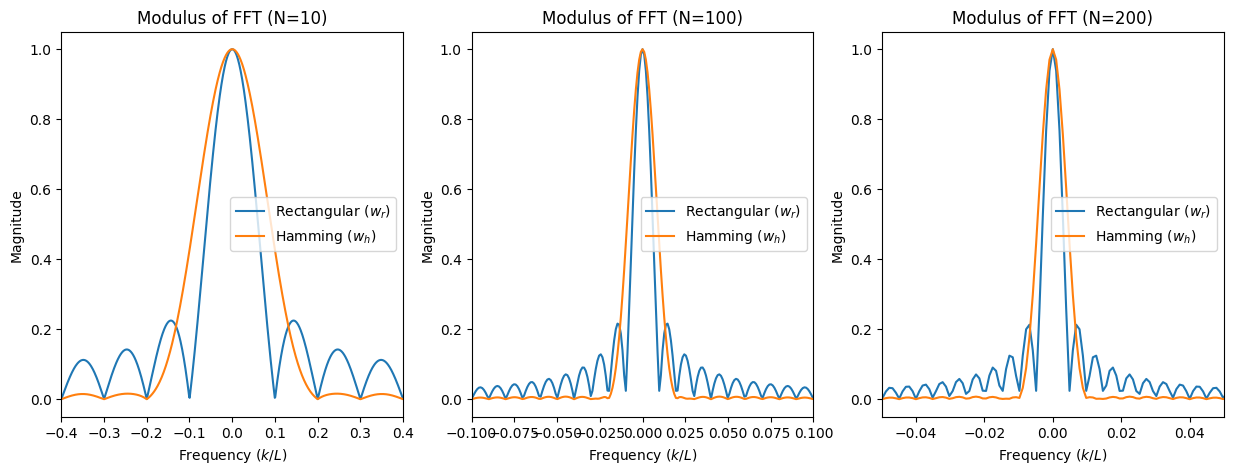

In [15]:
L = 1024  
N_values = [10, 100, 200]  
x_lims = [0.4, 0.1, 0.05]    
    
freqs = np.fft.fftshift(np.fft.fftfreq(L))

plt.figure(figsize=(15, 5))

for i, N in enumerate(N_values):
    n = np.arange(N)
    
    w_rect = np.ones(N) 
    w_hamm = 0.54 - 0.46 * np.cos(2 * np.pi * n / N)
    

    # Normalize windows w.r.t L1 norm
    w_rect = w_rect / np.sum(np.abs(w_rect))
    w_hamm = w_hamm / np.sum(np.abs(w_hamm))

    F_rect = np.fft.fft(w_rect, L)
    F_hamm = np.fft.fft(w_hamm, L)
    
    F_rect_shifted = np.fft.fftshift(F_rect)
    F_hamm_shifted = np.fft.fftshift(F_hamm)
    
    plt.subplot(1, 3, i + 1)
    plt.plot(freqs, np.abs(F_rect_shifted), label='Rectangular ($w_r$)')
    plt.plot(freqs, np.abs(F_hamm_shifted), label='Hamming ($w_h$)')
    
    plt.title(f'Modulus of FFT (N={N})')
    plt.xlabel('Frequency ($k/L$)')
    plt.ylabel('Magnitude')
    plt.xlim([-x_lims[i], x_lims[i]])
    plt.legend()
    

### Question 2

Increasing the window length $N$ causes the main lobe of the window's Fourier transform to become narrower. This happens because $N$ getting larger implies convoluting with a larger chunk of the signal, which makes our approximation closer to the infinite duration, which yields a Dirac distribution the neutral operator for convolution in the frequency domain.

## Exercise 2

### Question 1

The coefficients are given by the inverse Fourier integral:
$$
h_n = \int_{-1/2}^{1/2} H(f) e^{2i\pi n f} df = \int_{-f_0}^{f_0} 1 \cdot e^{2i\pi n f} df
$$


**Case 1: $n = 0$**
When $n=0$, the exponential term is $e^0 = 1$.
$$
h_0 = \int_{-f_0}^{f_0} df = \left[ f \right]_{-f_0}^{f_0} = f_0 - (-f_0) = 2f_0
$$

**Case 2: $n \neq 0$**

\begin{align*}

h_n &= \left[ \frac{e^{2i\pi n f}}{2i\pi n} \right]_{-f_0}^{f_0} 
\\ & = \frac{e^{2i\pi n f_0} - e^{-2i\pi n f_0}}{2i\pi n} 
\\ & = \frac{2i \sin(2\pi n f_0)}{2i\pi n}
\\ & = \frac{\sin(2\pi f_0 n)}{\pi n}.

\end{align*}

However, the case distinction is not needed since $ \frac{\sin(2\pi f_0 n)}{\pi n} \sim_{n \to 0} 2f_0 .$, thus $h_n = 2f_0 \text{sinc}(2f_0 n)$.


### Question 2, 3 and 4

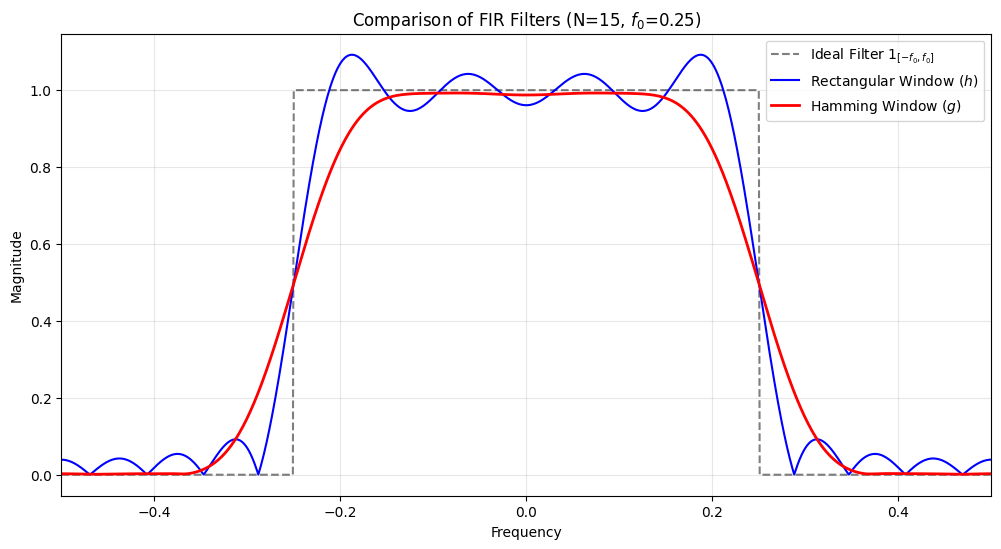

In [ ]:

def FIR(f0, N):
    n = np.arange(N)
    tau = (N - 1) / 2
    h = 2 * f0 * np.sinc(2 * f0 * (n - tau))
    
    w_hamm = 0.54 - 0.46 * np.cos(2 * np.pi * n / N)
    g = h * w_hamm
    
    return h, g

N = 15
f0 = 0.25  

h_rect, g_hamm = FIR(f0, N)

L = 1024 
freqs = np.fft.fftshift(np.fft.fftfreq(L))
H_fft = np.fft.fftshift(np.fft.fft(h_rect, n=L))
G_fft = np.fft.fftshift(np.fft.fft(g_hamm, n=L))

plt.figure(figsize=(12, 6))

ideal_response = np.where(np.abs(freqs) <= f0, 1.0, 0.0)
plt.plot(freqs, ideal_response, 'k--', label='Ideal Filter $1_{[-f_0, f_0]}$', alpha=0.5)

plt.plot(freqs, np.abs(H_fft), 'b-', label='Rectangular Window ($h$)')
plt.plot(freqs, np.abs(G_fft), 'r-', label='Hamming Window ($g$)', linewidth=2)

plt.title(f'Comparison of FIR Filters (N={N}, $f_0$={f0})')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim(-0.5, 0.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In general, the Hamming window $g$ is a better filter since the spectral leakage (oscillations) is significantly reduced compared to $h$. The rectangular window introduces too many artifacts (rpples) to be practical, even tho the transition is a bit sharper.

## Exercise 3

### Question 1

\begin{align*}
G(\xi) &= \sum_{n=-\infty}^{+\infty} 2h_n \cos(2\pi f_1 n) e^{-2i\pi n\xi} \\
&= \sum_{n=-\infty}^{+\infty} h_n \left( e^{2i\pi f_1 n} + e^{-2i\pi f_1 n} \right) e^{-2i\pi n\xi} \\
&= \sum_{n=-\infty}^{+\infty} h_n e^{-2i\pi n(\xi - f_1)} + \sum_{n=-\infty}^{+\infty} h_n e^{-2i\pi n(\xi + f_1)} \\
&= H(\xi - f_1) + H(\xi + f_1).
\end{align*}

### Question 2

We construct a causal low-pass filter $h_{LP}$ with cutoff frequency $f_0$. To ensure causality and linear phase (symmetry), the impulse response is shifted to be centered at $\tau = \frac{N-1}{2}$ :
    $$h_{LP}[n] = 2f_0 \cdot \text{sinc}\left(2f_0(n-\tau)\right) \cdot w_{hamming}[n]$$

We then apply the property from Q1. However, to maintain the linear phase of the resulting filter, the modulating cosine wave must also be centered around $\tau$. If we modulated simply by $\cos(2\pi f_1 n)$, the symmetry would be broken.

The final formula for the band-pass coefficients $g[n]$ is:
$$g[n] = \underbrace{2 \cdot h_{LP}[n]}_{\text{Amplitude}} \cdot \underbrace{\cos\left(2\pi f_1 (n - \tau)\right)}_{\text{Centered Modulation}}$$

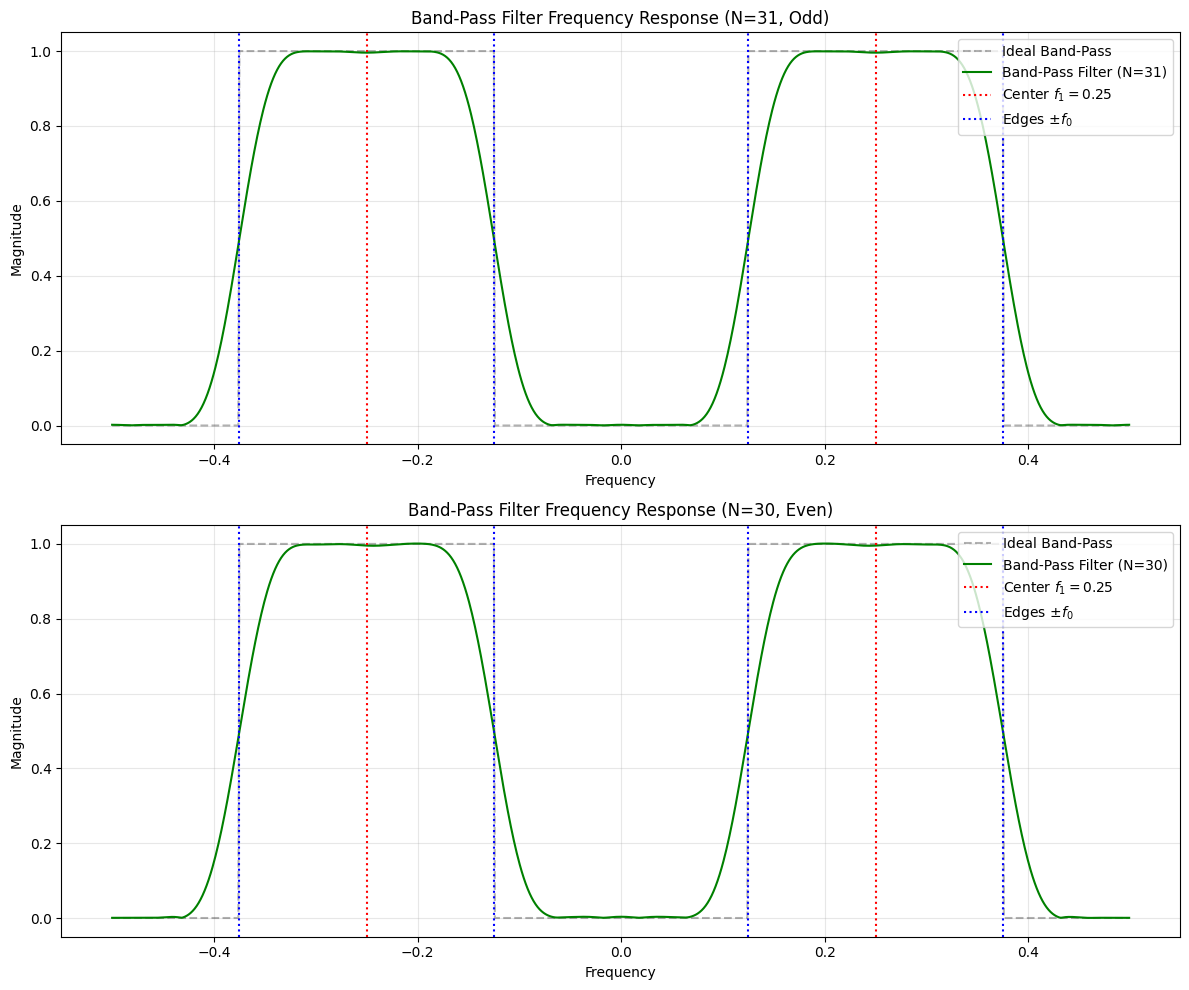

In [ ]:
def BandPass_Filter(f0, f1, N):
    n = np.arange(N)
    tau = (N - 1) / 2.0
    h_ideal = 2 * f0 * np.sinc(2 * f0 * (n - tau))
    
    w_hamm = 0.54 - 0.46 * np.cos(2 * np.pi * n / N) # using formula from Ex 1
    h_lp = h_ideal * w_hamm
    
    modulation = 2 * np.cos(2 * np.pi * f1 * (n - tau))
    g = h_lp * modulation
    
    return g


f0 = 1.0/8.0
f1 = 1.0/4.0
L = 1024
freqs = np.fft.fftshift(np.fft.fftfreq(L))

N_values = [31, 30] 

plt.figure(figsize=(12, 10))

for i, N in enumerate(N_values):
    g_bp = BandPass_Filter(f0, f1, N)
    G_fft = np.fft.fftshift(np.fft.fft(g_bp, n=L))
    H_ideal = np.where( (np.abs(freqs) >= (f1-f0)) & (np.abs(freqs) <= (f1+f0)), 1.0, 0.0)
    
    plt.subplot(2, 1, i+1)
    plt.plot(freqs, H_ideal, 'k--', label='Ideal Band-Pass', alpha=0.3)
    plt.plot(freqs, np.abs(G_fft), 'g-', label=f'Band-Pass Filter (N={N})')
    
    plt.axvline(x=f1, color='r', linestyle=':', label=f'Center $f_1={f1}$')
    plt.axvline(x=f1-f0, color='b', linestyle=':', label=f'Edges $\\pm f_0$')
    plt.axvline(x=f1+f0, color='b', linestyle=':')
    plt.axvline(x=-f1, color='r', linestyle=':')
    plt.axvline(x=-f1+f0, color='b', linestyle=':')
    plt.axvline(x=-f1-f0, color='b', linestyle=':')
    
    plt.title(f'Band-Pass Filter Frequency Response (N={N}, { "Odd" if N%2 else "Even" })')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()